# Introducion about data

Link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**

**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9)  avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Overview data

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [234]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
display('Show data')
data.head()

'Show data'

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Display shape of data , feature ,info about data 

In [235]:
print(f"Shape of data: {data.shape}")
print(f"Column names: {data.columns}")
display('Show data info')
data.info()

Shape of data: (5110, 12)
Column names: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


'Show data info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Display statistics value 

### Numerical columns

In [236]:
display('Show numeric data description')
data.describe()

'Show numeric data description'

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Category columns

In [237]:
display('Show category data description')
data.describe(include=['O'])

'Show category data description'

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Problem Understanding

* **Feature** : id, gender, age, hypertension, heart_disease, ever_married,work_type, Residence_type, avg_glucose_level, bmi,
smoking_status
* **Target** : stroke
* **Math Problem** : Classification stroke or not stroke based on feature  

# Data Understanding

## Missing value 

In [238]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Most columns don't have null values. The null value focuses only on the BMI feature**

## Outlier (Noise) value

In [239]:
data.drop(['id'], axis=1, inplace=True)

In [240]:
numeric_feature = [col for col in data.columns if data[col].dtype != 'O']
print("Number of numeric features: ", len(numeric_feature))
print("Numeric features: ", numeric_feature)

Number of numeric features:  6
Numeric features:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


**We have 7 numeric features. 'Id' is not a valuable feature. 'Hypertension' ,'heart disease' , and 'stroke' are just category features that were digitized. So we will remove  'Id', 'Hypertension', and 'heart disease in the numeric feature** 

In [241]:
numeric_feature.remove('stroke')
numeric_feature.remove('hypertension')
numeric_feature.remove('heart_disease')
numeric_feature

['age', 'avg_glucose_level', 'bmi']

In [242]:
#function to show the distribution of data
def Viz_NumericFeature(data, feature):
  """ 
  Visualize numeric feature
  input: data, feature
  output: histogram, boxplot
  """
  # gridspec is ration of each plot 
  fig,axis = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios" :(0.15 , 0.85)})
  # Set height of figure
  fig.set_figheight(3)
  # Set width of figure
  fig.set_figwidth(15)
  sns.boxplot(data[feature],ax = axis[0])
  sns.histplot(data[feature],ax = axis[1])
  plt.show()

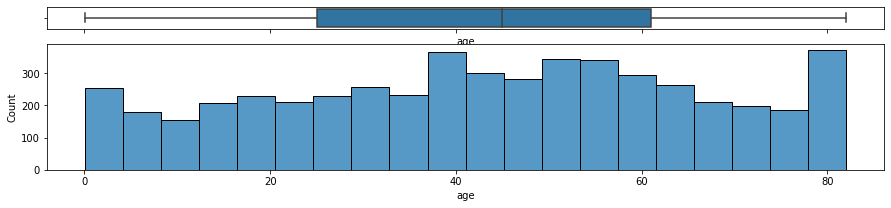

In [243]:
Viz_NumericFeature(data=data, feature='age')

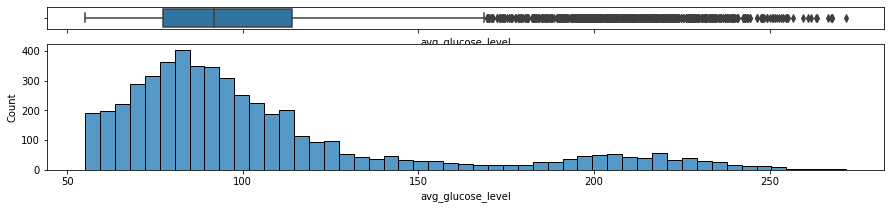

In [244]:
Viz_NumericFeature(data=data, feature='avg_glucose_level')

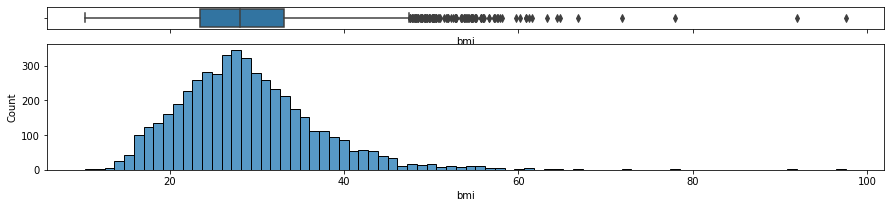

In [245]:
Viz_NumericFeature(data=data, feature='bmi')    

In three numeric features, we can see 'BMI' and 'avg_glucose_level' have high outlier values. Instead of, 'age' does have any outlier value

## Inconsistent value

In [246]:
category_feature = [col for col in data.columns if data[col].dtype == 'O']
print("Number of category features: ", len(category_feature))
print("Category features: ", category_feature)

Number of category features:  5
Category features:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [247]:
def showInfoOfEachCategory(data, feature):
  """
  Show info of each category
  input: data, feature
  output: number of unique values, unique values
  """
  print(f"Number of unique values of {feature}: {data[feature].nunique()}")
  print(f"Unique values of {feature}: {data[feature].unique()}")


In [248]:
for feature in category_feature:
    print(f"Feature :{feature}")
    showInfoOfEachCategory(data, feature)
    print("+----------------------------------+")

Feature :gender
Number of unique values of gender: 3
Unique values of gender: ['Male' 'Female' 'Other']
+----------------------------------+
Feature :ever_married
Number of unique values of ever_married: 2
Unique values of ever_married: ['Yes' 'No']
+----------------------------------+
Feature :work_type
Number of unique values of work_type: 5
Unique values of work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
+----------------------------------+
Feature :Residence_type
Number of unique values of Residence_type: 2
Unique values of Residence_type: ['Urban' 'Rural']
+----------------------------------+
Feature :smoking_status
Number of unique values of smoking_status: 4
Unique values of smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
+----------------------------------+


**Non Inconsistent value in data**

## Imbalanced

In [249]:
target_feature = 'stroke'
print(f"Number of unique values of {target_feature}: {data[target_feature].nunique()}")

Number of unique values of stroke: 2


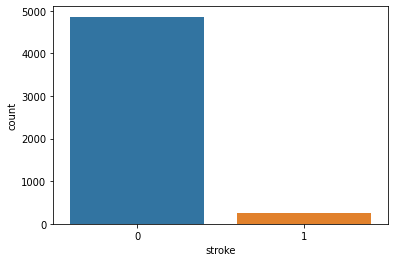

In [250]:
# Vizuallize target feature in bar chart
sns.countplot(data[target_feature])
plt.show()

**we can see data have high imbalanced data**

# Feature Understanding

In [251]:
category_feature.append('hypertension')
category_feature.append('heart_disease')

In [252]:
category_feature

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

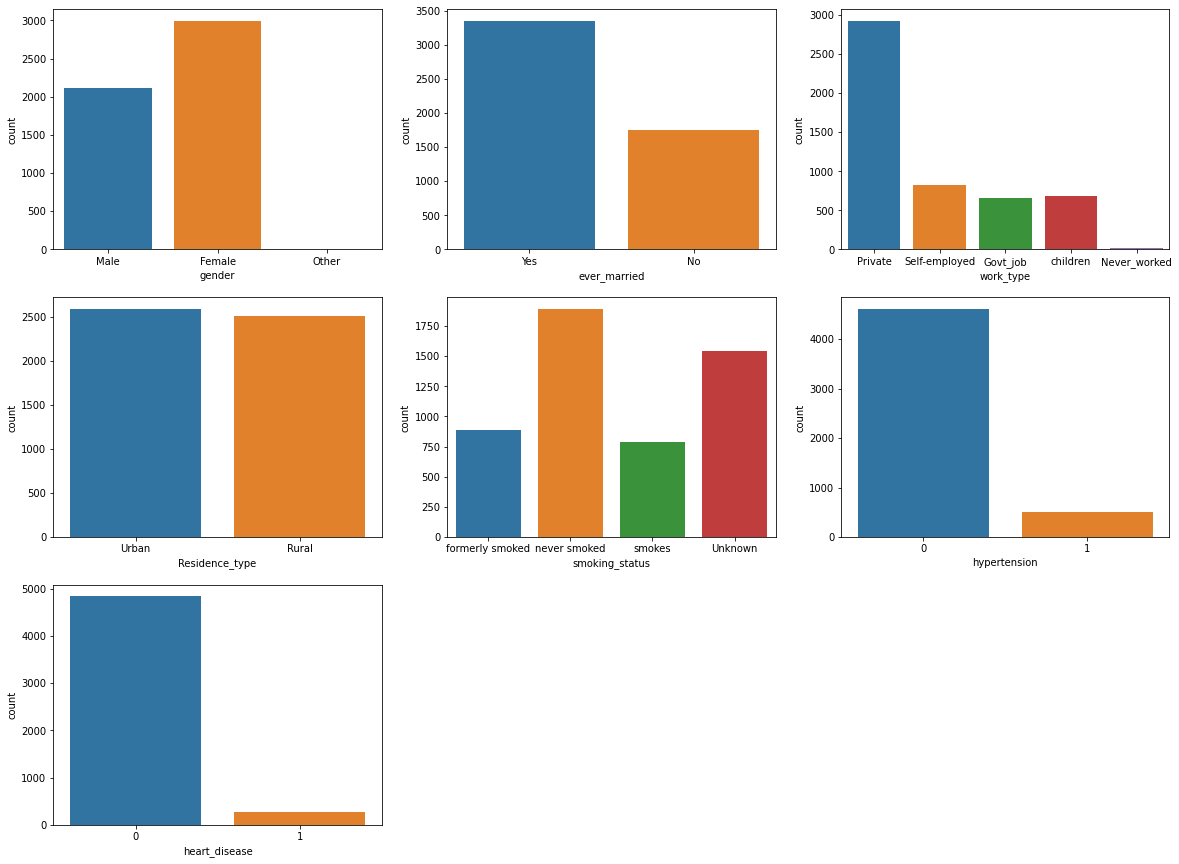

In [253]:
# draw bar chart for each category feature
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i,feature in enumerate(category_feature):
    sns.countplot(data[feature],ax = axes[i//3, i%3])
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 1])
plt.show()

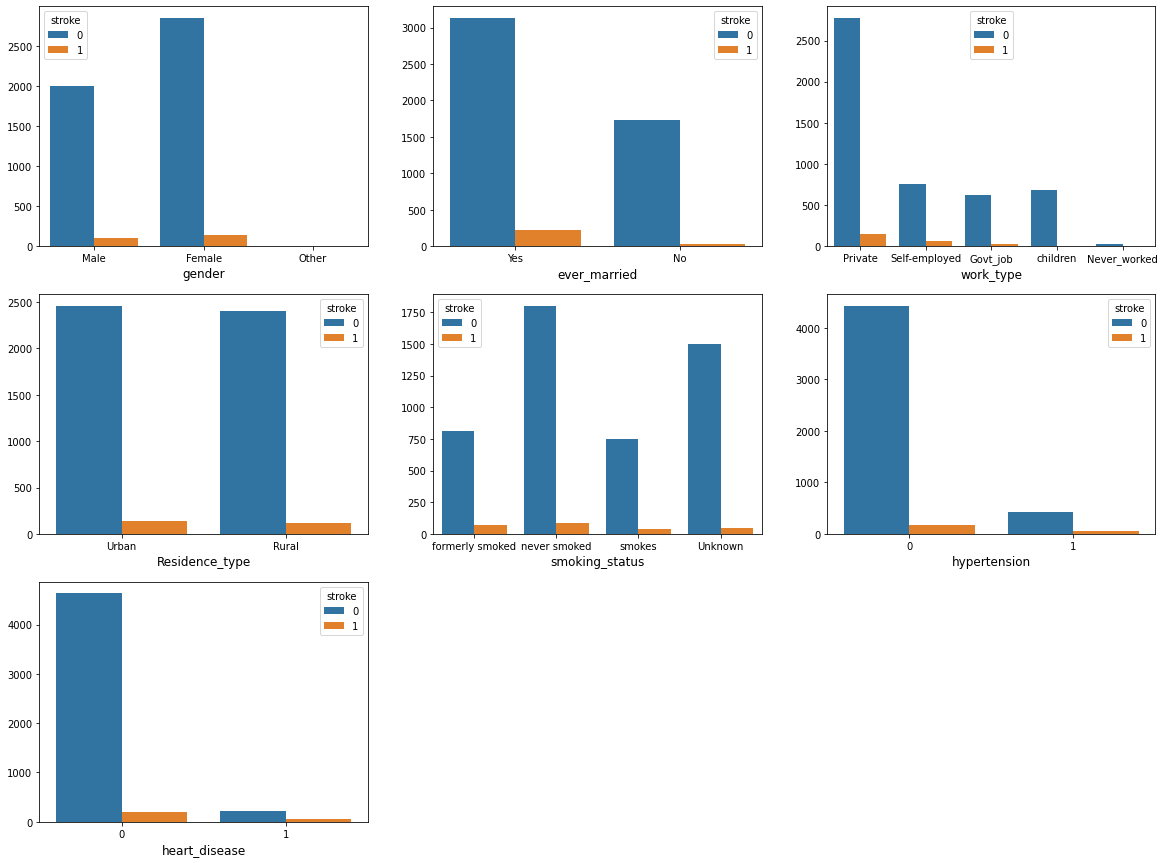

In [254]:
# draw countplot for each category feature in each subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i, feature in enumerate(category_feature):
    sns.countplot(data=data, x=feature, hue=target_feature, ax=axes[i//3, i%3])
    # Set text of x axis
    axes[i//3, i%3].set_xlabel(feature, fontsize=12)
    # remove y axis
    axes[i//3, i%3].set_ylabel('')
# Remove two last subplot
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 1])
plt.show()

# Feature Engineering

## Data Encoding


In [255]:
data_encode = data.copy()
features_encoding = [col for col in data_encode.columns if data_encode[col].dtype == 'O']
features_encoding

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [256]:
from sklearn.preprocessing import LabelEncoder
def encoding_data(data_encode, features_encoding):
    """
    Encoding data
    input: data, features_encoding
    output: data, encoder_dict
    """
    encod_dict = {}
    for feature in features_encoding:
        label_encoder = LabelEncoder()
        encod_dict[feature] = label_encoder
        data_encode[feature] = label_encoder.fit_transform(data_encode[feature])
    return data_encode, encod_dict

In [257]:
# Ecoding data
data_encode, encod_dict = encoding_data(data_encode, features_encoding)

In [258]:
data_encode.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


## Processing null value

In [259]:
data_process_null = data_encode.copy()

In [260]:
data_process_null.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Using median to impute null value

In [261]:
data_process_null = data_process_null.fillna(data_process_null.median())
data_process_null.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Processing noise data

In [262]:
data_processing_noise = data_process_null.copy()
target_feature = 'stroke'

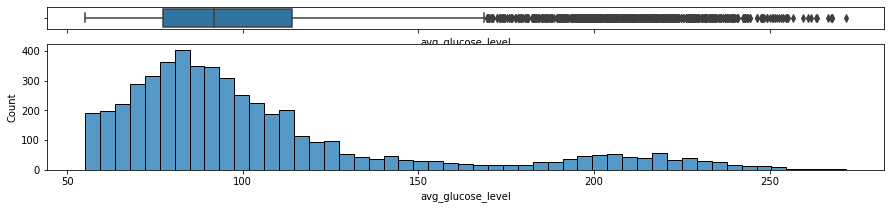

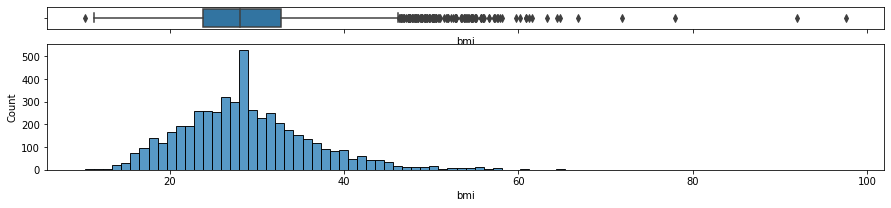

In [263]:
NumericFeature = ['avg_glucose_level', 'bmi']

for feature in NumericFeature:
    Viz_NumericFeature(data_processing_noise, feature)
    plt.show()

In [264]:
def IQR_OutlierDetector(data, feature, ConfParm = 1.5 , display = False):
    """
    Detect outlier using IQR method

    Parameters
    ----------
    data : DataFrame
        Data to detect outlier
    feature : str
        Feature to detect outlier
    ConfParm : float, optional
        Confidence parameter. The default is 1.5.
    display : bool, optional
        Display or not. The default is True.

    Returns
    -------
    outlier_index : list
        List of index of outlier
    """
    q1 , q3 = np.quantile(data[feature], 0.25) , np.quantile(data[feature], 0.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - ConfParm * iqr  , q3 + ConfParm *iqr
    LowerOutLierData = [(idx,val) for idx,val in data[feature].items() if val < lower_bound]
    UpperOutLierData = [(idx,val) for idx,val in data[feature].items() if val > upper_bound]
    # Check to display data
    if display:
        print(lower_bound,upper_bound)
        print(LowerOutLierData)
        print(UpperOutLierData)
    return LowerOutLierData , UpperOutLierData, (lower_bound,upper_bound)

In [265]:
def IQR_imputation(data,feature,LowerOutLierData,UpperOutLierData,OutLierRange,target):
    """
    Imputation outlier using IQR method

    Parameters
    ----------
    data : DataFrame
        Data to imputation outlier
    feature : str 
        Feature to imputation outlier
    LowerOutLierData : list
        List of lower outlier
    UpperOutLierData : list
        List of upper outlier
    OutLierRange : tuple
        Range of outlier
    target : str
        Target feature

    Returns
    -------
    data : DataFrame
        Data after imputation outlier
    
    """
    df = data[(data[feature] > OutLierRange[0]) & (data[feature] < OutLierRange[1])]
    #Using mapping data to get higher performance than using for loop
    #Caculate mean of data not noisy in each feature
    TargetDict = {val : np.mean(df[df[target] == val][feature]) for val in df[target].unique()}

    for idx, val in LowerOutLierData:
        data.loc[idx,feature] = TargetDict[data.loc[idx,target]]
    for idx, val in UpperOutLierData:
        data.loc[idx,feature] = TargetDict[data.loc[idx,target]]

    return data[feature],TargetDict

Feature: avg_glucose_level


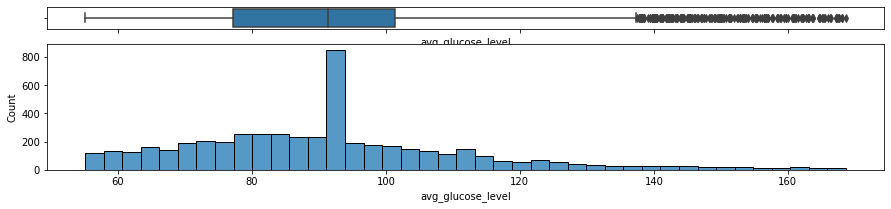

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Feature: bmi


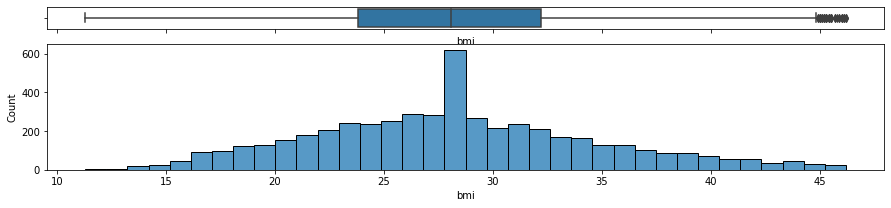

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_


In [266]:
for feature in NumericFeature:
    print(f"Feature: {feature}")
    LowerOutLierData, UpperOutLierData, OutLierRange = IQR_OutlierDetector(data_processing_noise, feature)
    data_processing_noise[feature],TargetDict = IQR_imputation(data_processing_noise,feature,LowerOutLierData,UpperOutLierData,OutLierRange,target_feature)
    Viz_NumericFeature(data_processing_noise, feature)
    print("*_"*50)


## Feature Scaling

In [280]:
data_scaling = data_processing_noise.copy()

In [281]:
#Standardizing a normal distribution
def Standardizing_normal(data, feature):
    """
    Scaling data

    Parameters
    ----------
    data : DataFrame
        Data to scaling
    feature : str
        Feature to scaling

    Returns
    -------
    data : DataFrame
        Data after scaling

    """
    data[feature] = (data[feature] - np.mean(data[feature])) / (np.std(data[feature]))
    return data[feature]

In [282]:
for feature in numeric_feature:
    data_scaling[feature] = Standardizing_normal(data_scaling, feature)

In [283]:
data_scaling.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,0.017216,1.275235,1,1
1,0,0.786070,0,0,1,3,0,0.017216,-0.023126,2,1
2,1,1.626390,0,1,1,2,0,0.683070,0.648967,2,1
3,0,0.255342,0,0,1,2,1,0.017216,0.939188,3,1
4,0,1.582163,1,0,1,3,0,0.017216,-0.649394,2,1


# Dataset partition


## Imblanced Handling